# Reinforcement Learning

By Hao Dong

The **agent** and **enviroment**

The environment is an entity that the agent can interact with, e.g. Pong game.

The agent controls the paddle to hit the ball back and forth. An agent can “interact” with the environment by using a predefined **action set**: $A = \{A_1, A_2, ... \}$ (all possible actions)

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>The goal of reinforcement learning algorithms is to teach the agent how to interact “well” with the environment so that the agent is able to obtain a good score under a predefined evaluation metric</p>
</div>

The agent receive a reward $r$ of $1$ when the ball hits the wall on the opposite side. 

At an arbitrary time step (a point at which observations can be made), $t$, the agent first observes the current state of the environment, $S_t$, and the corresponding reward value, $R_t$.

The agent then decides what to do next based on the state and reward information. The action the agent intends to perform, $A_t$, gets fed back into the environment such that we can obtain the new state $S_{t+1}$ and reward $R_{t+1}$.

$$(S_t,R_t) \rightarrow A_t \rightarrow (S_{t+1},R_{t+1})$$

The observation of the environment state $s$($s$ is a general representation of state regardless of time step $t$) from the agent’s perspective does not always contain all the information about the environment. 

If the observation only contains partial state information, the environment is *partially observable*. Nevertheless, if the observation contains the complete state information of the environment, the environment is *fully observable*.

The action $a$ ($a$ is a general representation of action regardless of time step $t$) is usually conditioned on the state $s$ to represent the behavior of the agent (Under assumption of fully observable environments.)

To provide feedback from the environment to the agent, a reward function $R$ generates an immediate reward $R_t$ according to the environment status and sends it to the agent at every time step. $R_t=R(S_t)$.

> Trajectory: 
> 
> A **trajectory** is defined: 
> 
> $\tau = (S_0, R_0,  A_0, S_1, R_1, A_1,...)$
> 
> A *trajectory*, being referred to also as an *episode*, is a sequence that goes from the initial state to the terminal state (for finite cases)

The initial state in a trajectory, $S_0$, is randomly sampled from the *start-state distribution*, denoted by $ρ_0$, in which:

$$S_0 \sim ρ_0(.)$$

The transition from a state (after taking an action) to the next state can be either *deterministic transition process* or *stochastic transition process*

For the *deterministic transition*, the next state $S_{t+1}$ is governed by a deterministic function:

$$S_{t+1} = f(S_t, A_t)$$

For the *stochastic transition* process, the next state $S_{t+1}$ is described as a probabilistic distribution:

$$S_{t+1} \sim p(S_{t+1}|S_t, A_t)$$

**Exploitation** means maximizing the agent performance using the existing knowledge, and its performance is usually evaluated by the expected reward. Given the actual knowledge, the agent doesn't take risk to explore.

The policy he took here is the **greedy policy**, which means the agent constantly performs the action that yields the highest expected reward based on current information, rather than taking risky trials which may lead to lower expected rewards.

**Exploration** means increasing existing knowledge by taking actions and interacting with the environment.

### Markov Decision Process

A Markov process (MP) is a *discrete stochastic process* with *Markov property*.

<center>
<img src="assets/markov-process-example.png" height=360>
</center>

This graph simulates how a person works on two tasks and goes to bed in the end.

If I'm doing the "Task 1" and exists the `30%` probability of stoping and go to play a "Game" and then, the probability of returning to do the "Task 1" is only `10%` and the probability of keep playing is `90%`.

Graphical Model of a Markov Process
<center>
<img src="assets/graphical-model-mp.png" height=80> </center>

$a \rightarrow b$ indicates the variable $b$ is depended on a vaiable $a$

The probabilistic graphical model can help us to have a more intuitive sense of the relationships between variables in reinforcement learning, as well as providing rigorous references when we derive the gradients with respect to different variables along the MP chains

MP follows the assumption of **Markov chain** (*memoryless property*) where the next state $S_{t+1}$
is only dependent on the current state $S_t$, with the probability of a state
jumping to the next state described as follows:

$$P(S_{t+1}|S_{t}) = P(S_{t+1}|S_0, ..., S_{t})$$

Also the *time homogeneus property*

$$P(S_{t+1}|S_{t}) = P(S_{t+2}|S_{t+1})$$

Given a finite *state set* $S$, we can have *state transition matrix* $P$

$ Ｓ= \{g, t_1, t_2, r, p, b\}$



<center>
<img src="assets/matrix-transition.PNG" height=170>
</center>

Where $P_{i,j}$ represents the probability of transferring the current state $S_i$ to the next state $S_j$.

$$ P(s=t_1|s=g)=10\%$$

The sum of each row must be equal to $1$ and the $P$ is always a square matrix.

A Markov Process can be represented by a tuple $<Ｓ, P>$

The next state is sample from $P$:

$$S_{t+1} \sim P_{S_t} $$

For continuous case a finite matrix can not be used to represent the transition

#### Markov Reward Process

We need to add feedback from the enviroment to the agent, so we extent

$<Ｓ, P>$ to $<Ｓ, P, R, \gamma>$, in which $R$ represent the *reward function* and $\gamma$ *reward discount factor*.

$$R_t = R(S_t)$$

So the Graphical Model of a Markov Process is updated to 
<center>
<img src="assets/graphical-model-mp-reward.png" height=170>
</center>

But, if we are considering to move to the next state, we should take account the rewards of the following next states that we will take in order to reach the $T$.

If a single trajectory $\tau$ has $T$ time steps, and the current time step $t=0$, then **the return** is the cummulative reward discounted by $\gamma \in (0,1)$  of a trajectory.

$$G_{t=0:T} = G_{t=0}^{(T)} = R(\tau)_{t=0}^{(T)} =  R_1 + \gamma R_2 + ... + \gamma^{T-1} R_T$$

<!-- $\gamma R_1 + ... + \gamma^{T} R_T$ is the discount factor of the future rewards that we get from the current time step $t=0$ following a set of actions ($a_1, a_2, ..., a_{T}$) -->

where $R_t$ is the **immediate reward** at time step $t$, and $T$ represents the time step of the terminal state and $r$ as a general representation of immediate reward value.

The discounted factor is especially critical when handling with infinite MRP cases

The value function $V(s)$ represents the expected return from the state $S_0$ that take the state value $s$ until final state.

<!-- $$V(s) = E[R_t|S_0=s]$$ -->
$$V(s) = E[G_{t=0}^{(T)}|S_0=s]$$

A simple way to estimate the $V(s)$ is Monte Carlo method, we can randomly sample a large number of trajectories starting from state $s$ according to the given state transition matrix $P$.

If the agent acts according to the policy $π$, we denote the *value function* as $V^π(s)$


<!-- tasks = ['Bed', 'Game', 'Pass', 'Rest', 'Task1', 'Task2']
rewards = {'Bed':0, 'Game':-1, 'Pass':10, 'Rest':1, 'Task1':-2, 'Task2':-2}

transition = np.array(
    [
        [1.0, 0.0, 1.0, 0.0, 0.0, 0.3],
        [0.0, 0.9, 0.0, 0.0, 0.3, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.6],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
        [0.0, 0.1, 0.0, 0.1, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.9, 0.7, 0.0]
    ]
)



for tk in  tasks:
    n_iter = 1
    print("V(S={})=".format(tk), end='')
    while n_iter<=10_000:    
        array = []
        task = tk
        target = 'Bed'
        G = 0
        gamma = 0.9
        t = 0
        while True:
            idx = tasks.index(task)
            reward = rewards[task]
            G = G + (gamma** t)*reward
            t+=1
            prob = transition[:, idx].copy()
            task = np.random.choice(tasks, p=prob)
            if task == target:
                array.append(G)
                n_iter+=1
                break

    print("{:.3f}".format(sum(array)/len(array)))} -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
gamma = 0.9
tasks = ['Bed', 'Game', 'Pass', 'Rest', 'Task1', 'Task2']
rewards = {'Bed':0, 'Game':-1, 'Pass':10, 'Rest':1, 'Task1':-2, 'Task2':-2}
value_function = {'Bed':0, 'Game':0, 'Pass':0, 'Rest':0, 'Task1':0, 'Task2':0}

transition = np.array(
    [
        [1.0, 0.0, 1.0, 0.0, 0.0, 0.3],
        [0.0, 0.9, 0.0, 0.0, 0.3, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.6],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
        [0.0, 0.1, 0.0, 0.1, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.9, 0.7, 0.0]
    ]
)

In [180]:
def get_trajectory(task:str, target:str):
    def trajectory(task:str, target:str, data:list):
        data.append(task)
        if task == target:
            return data
        else:
            idx = tasks.index(task)
            next_task =np.random.choice(tasks, p=transition[:, idx])
            return trajectory(next_task, target, data)

    return trajectory(task, target, [])

In [ ]:
for task in tasks:
    n_iter = 10_000
    v = 0
    while n_iter > 0:
        # 1. Simulating trajectory
        simulated_trajectory = get_trajectory(task, 'Bed')

        # 2. Simulating rewards
        simulated_rewards = np.array([rewards[x] for x in simulated_trajectory])

        # 3. Computing return
        calculated_return = np.sum(
            np.cumprod(
                np.ones_like(simulated_rewards)*gamma)/gamma *simulated_rewards)
        v = v + calculated_return
        n_iter -= 1
    n_iter = 10_000
    value_function[task] = v/n_iter

In [191]:
value_function

{'Bed': 0.0,
 'Game': -5.922879947584755,
 'Pass': 10.0,
 'Rest': 3.9446244226534253,
 'Task1': -1.199615908058622,
 'Task2': 3.7855726236614347}

The agent policy usually selects the next state with higher value.

E.g. if we are in the *Game* state, we only have, two options: *Game* or *Task1*, we should choice *Task1* (since the higher value of $V(S=\text{Task1})$). And if we are in th *Task1* state, we would have two options: *Game* or *Task2*.  We should choice *Task2* (since the higher value of $V(S=\text{Task2})$) and so on.

$$\text{Game} \rightarrow \text{Task1} \rightarrow \text{Task2} \rightarrow \text{Pass} \rightarrow \text{Bed}$$

#### Markov Decision Process (MDP)

The actions taken above only depend on the expected value of discounted reward  given a state. The action that maximize this expected value is taken. 

But we do more granularity this expected value and compute at level of action

In the tuple $$< Ｓ, P, R, \gamma>$$ we add $Ａ$

$$< Ｓ, Ａ, P, R, \gamma>$$

$$ P(s'|s,a) = P(S_{t+1} = s'|S_{t}=s, A_t=a)$$

Where $Ａ$ represent *finite action set* $\{a_0, a_1, a_2, a_3, ..., a_{T-1}\}$ and the immediate reward becomes:

$$R_{t+1} = R(S_t=s, A_t=a, S_{t+1}=s')$$

<!-- Reward Function ($ R(s, a, s') $):  -->
The immediate reward received when transitioning from state $ s $ to state $ s' $ after action $ a $.


A *policy* $\pi$ represents the way in which the agent behaves based on its observations of the enviroment.

$$\pi(a|s) = p(A_t=a|S_t = s)$$

**Expected return** is the expectation of returns over all possible trajectories under a policy. Therefore, **the goal of reinforcement learning is to find the higher expected return by optimizing the policy**.

The probability of the T-step trajectory for MDP is:
Based on a behavior of the agent will generate a path or trajectory.

$$p(\tau|\pi)_{t=0}^{T-1} = p_0(S_0) \prod_{t=0}^{T-1} p(S_{t+1}|S_t, A_t)\pi(A_t|S_t)$$

If is given the initial state $S_0$, the probability of the T-step trajectory for MDP will updated to:

$$ p(\tau|\pi)_{t=0}^{T-1} = \prod_{t=0}^{T-1} p(S_{t+1}|S_t, A_t)\pi(A_t|S_t)$$


Given state $S_t$ and action $A_t$, if only exists way to go state $S_{t+1}$ the probability of the T-step trajectory is reduced to:

$$ \prod_{t=0}^{T-1}p(S_{t+1}|S_t, A_t)\pi( A_t|S_t) =  \prod_{t=0}^{T-1}p(S_{t+1}|S_t, A_t)$$

<!-- $$p(S_{t+1}|S_t, A_t)\pi( A_t|S_t) = \prod_{t=0}^{T-1} \pi( A_t|S_t)$$ -->

Given the reward function $R$ and all possible trajectories $τ$, the expected return $J(π)$ starting from time step $t=0$ is defined as follows


$$J(\pi) = \sum_{\tau} P(\tau|\pi)_{t=0}^{T-1} R(\tau)_{t=0}^{T} = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}]$$


The RL optimization problem is to improve the policy for maximizing the expected return with optimization methods. 

The **optimal policy** $π^∗$ can be expressed as

$$\pi^* = \argmax_{\pi} J(\pi)$$

Given policy $\pi$, the **value function** $V(s)$ can be defined as:

$$V^{\pi} (s) = E_{\tau \sim \pi}[R(\tau)_{t}^{T}|S_{t}=s]$$

where $τ ∼ π$ means the trajectories $τ$ are sampled given the policy $π$

In MDP, given an action, we have the **action-value function** $Q^\pi(s, a)$, which depends on both the state and the action just taken

$$Q^{\pi} (s, a) = E_{\tau \sim \pi}[R(\tau)_{t}^{T}|S_{t}=s, A_{t}=a]$$

We need to keep in mind that the $Q^π(s, a)$ depends on $π$, as the
estimation of the value is an expectation over the trajectories by the policy
$π$. This also indicates if the $π$ changes, the corresponding $Q^π(s, a)$ will also change.

We therefore usually call the value function estimated with a specific policy *the on-policy value function* (with lower case $q$), for the distinction from
the optimal value function estimated with the optimal policy.

$$q_{\pi}(s,a) = E_{\tau \sim \pi}[R(\tau)_{t}^{T}|S_t=s, A_t=a]$$

$$v_{\pi}(s) = E_{a \sim \pi}[q_{\pi}(s,a)] $$

$$v_{\pi}(s) = \sum_{a} \pi(a|s)  q_{\pi}(s,a) $$
<!-- =E_{\tau \sim \pi}[R(\tau)|S_0=s] -->

We can use *Monte Carlo method* to estimate

Bellman Equation for **Value Function**

Given state $s$ in time step $t$ ($s'$ in time step $t+1$) with a policy $\pi$, and the all trajectories $\tau$ upto time step $T$ with respective rewards, we can define  the value function  $v^{\pi} (s)$

$$v^{\pi} (s) = E_{\tau \sim \pi}[R(\tau)_{t=t}^{T}|S_{t}=s] = \sum_{\tau} P(\tau|\pi)_{t=t}^{T-1} R(\tau)_{t=t}^{T} $$



We can split the above into 
1.  $P(\tau|\pi)_{t=t}^{T-1} =  P(s'|s, a) \pi(a|s) P(\tau|\pi)_{t=t+1}^{T-1}$

2. $R(\tau)_{t=t}^{T} = R_{t+1} + \gamma R(\tau)_{t=t+1}^{T}$ (*Return* after take action $a$ in the time step $t$)


$$v^{\pi} (s) = \sum_{\tau} P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=t+1}^{T-1} [R_{t+1} + \gamma R(\tau)_{t=t+1}^{T}]$$

$$v^{\pi} (s) = \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s) \sum_{\tau} P(\tau|\pi)_{t=t+1}^{T-1} [R_{t+1} + \gamma R(\tau)_{t=t+1}^{T}]$$

$$v^{\pi} (s) = \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s)[R_{t+1} + \gamma \sum_{\tau} P(\tau|\pi)_{t=t+1}^{T-1} R(\tau)_{t=t+1}^{T}]$$

$$v^{\pi} (s) = \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s)[R_{t+1} + \gamma v^{\pi} (s')]$$


Bellman Equation for **Value Action Function**

Let be state $s$ in time step $t$ (state $s'$ and action $a'$ in time step $t$) with a policy $\pi$, and the all trajectories $\tau$ upto time step $T$ with respective rewards, we can define  the value function  $q^{\pi} (s, a)$

$$q^{\pi} (s, a) = E_{\tau \sim \pi}[R(\tau)_{t=t+1}^{T}|S_{t}=s, A_{t}=a] = \sum_{\tau} P(\tau|\pi)_{t=t+1}^{T-1} R(\tau)_{t=t+1}^{T} $$



We can split the above into 
1.  $P(\tau|\pi)_{t=t+1}^{T-1} =  P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=t+1}^{T-1}$

2. $R(\tau)_{t=t+1}^{T} = R_0 + \gamma R(\tau)_{t=t+1}^{T}$

3. Since $s$  and $a$ are given, $\pi(a|s) = 1$


$$q^{\pi} (s,a) = \sum_{\tau} P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=t+1}^{T-1} [R_{t+1} + \gamma R(\tau)_{t=t+1}^{T}]$$

$$q^{\pi} (s,a) = \sum_{s'} P(s'|s,a) \sum_{\tau} P(\tau|\pi)_{t=t+1}^{T-1}[ R_{t+1} + \gamma R(\tau)_{t=t+1}^{T}]$$

$$q^{\pi} (s,a) = \sum_{s'} P(s'|s,a) [R_{t+1} + \gamma \sum_{\tau} P(\tau|\pi)_{t=t+1}^{T-1} R(\tau)_{t=t+1}^{T}]$$

$$q^{\pi} (s, a) = \sum_{s'} P(s'|s,a) [R_{t+1} + \gamma v^{\pi} (s')]$$

$$q^{\pi} (s, a) = \sum_{s'} P(s'|s,a) [R_{t+1} + \gamma \sum_{a'} \pi(a'|s') q^{\pi} (s',a')]$$

<!-- #### Bellman Ecuation and Optimality

Assumptions
- Let $x_t$ be the state at same time $t$
- The initial decision begin at $t=0$, so the intial state is $x_0$
- The set of available actions  that depends on current state $a_t \in \Gamma(x_t)$
- The next state after taken the action $a_t$ is $x_{t+1}=T(x_t, a_t)$
- The payoff from taking the action $a_t$ is $F(x_t,a_t )$
- Discount factor $0< \beta<1$

$V(x_0)$ denote the *optimal value* that can be obtained by maximizing this *objetive function* subject to contraints.

$$V(x_0) = \max_{\{ a_t\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^t F(x_t, a_t)$$

*Principle of Optimality*: An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision. (See Bellman, 1957, Chap. III.3.)
$$V(x_0) = \max_{\{ a_0\}}[ F(x_0, a_0) +  \max_{\{ a_t\}_{t=1}^{\infty}}\sum_{t=1}^{\infty} \beta^t F(x_t, a_t)]$$

$$V(x_0) = \max_{\{ a_0\}}[F(x_0, a_0)+V(x_1)]$$

It reads from inner to outer, first maximize from the step $t=1$ to next, then add the payoff of the initial state and maximize it.  -->


#### Optimal Value Functions

Since on-policy **value functions** are estimated with respect to the policy
itself, different policies will lead to different value functions, even for the
same set of states and actions. Among all those different value functions,
we define the optimal value function as

$$v_*(s) = \max_{\pi} v_{\pi}(s)$$

For **action-value function**

$$q_{*}(s, a) = \max_{\pi} q_{\pi}(s, a)  $$

We will update the policy $\pi$ such that it converges to the optimal policy. We will update the matrix transition.

<!-- #### Bellman Optimality Equation

Bellman equation for optimal value functions (*Optimal value function* and *Optimal action-value function*)

We choose the action (in which we can choose) that maximizes the expected return.

Bellman equation for optimal value function

$$v^{\pi}_{*} (s) = \max_{a} \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s)[R_{t+1} + \gamma \max_{a'} v^{\pi}_{*} (s')]$$

Bellman equation for optimal action-value function

The action $a$ is given for time $t$ so we can not maximize it.

$$q^{\pi}_{*} (s, a) = \sum_{s'} P(s'|s,a) [R_{t+1} + \gamma \sum_{a'} \pi(a'|s') \max_{a'} q^{\pi}_{*} (s',a')]$$ -->

#### Dynamic Programming

"Dynamic" means that the problem has sequential or temporal components.

"Programming" 

DP solves a complex problem by breaking it down into smaller subproblems.

<!-- ### 📘 Full Explanation of **Dynamic Programming (DP)** in Reinforcement Learning (RL)

**Dynamic Programming (DP)** is a fundamental technique in **Reinforcement Learning (RL)** used to solve problems where the agent can model the environment completely — that is, when the agent knows all the **transition probabilities** and **reward functions**.

It is one of the earliest and most classical approaches to solving **Markov Decision Processes (MDPs)**. -->

<!-- ---

## 🔍 What Is Dynamic Programming?

In the context of RL:

> **Dynamic Programming (DP)** refers to a collection of algorithms that can compute optimal policies **given a perfect model of the environment**, described as a **Markov Decision Process (MDP)**.

--- -->

Prerequisites for Using DP

To apply DP methods in RL, you need:

1. **Full knowledge of the environment**
   - Transition probability $ P(s' | s, a) $
   - Reward function $ R(s, a, s') $
2. The problem must be expressible as an **MDP**
3. Sufficient computational resources (DP scales poorly with large state spaces)

Two properties that a *problem* must have for DP to be applicable:
1. *Optimal substructure*: Optimal solution can be decomposed into optimal solutions for its sub-problems:
2. *Overlapping sub-problems*: implies that the number of sub-problems is finite and the problem ocurr recursively so sub-solutions can be cached and reused.

> Recursion is a programming technique that uses functions to solve problems by breaking them down into smaller, more manageable problems. It's a method that involves a function calling itself repeatedly until a base case is reached

Model a problem as an MDP and using Bellman's recursion equation allow us meet the two properties of DP.



<!-- --- -->

<!-- ## 🧠 Core Concepts in DP for RL

| Concept | Description |
|--------|-------------|
| **Policy Evaluation** | Estimating the value function $ V^\pi(s) $ for a given policy $ \pi $ |
| **Policy Improvement** | Improving a policy using the value function |
| **Policy Iteration** | Alternating between policy evaluation and improvement |
| **Value Iteration** | Directly computing the optimal value function without explicitly maintaining a policy | -->

<!-- Markov Decision Process (MDP) Recap

An MDP is defined by:

- A set of **states**: $ \mathcal{S} $
- A set of **actions**: $ \mathcal{A} $
- A **transition probability function**:  
  $ P(s' | s, a) = \text{Probability of moving to state } s' \text{ from state } s \text{ after action } a $
- A **reward function**:  
  $ R(s, a, s') = \text{Expected reward received after transitioning to } s' \text{ from } s \text{ via } a $
- A **discount factor**:  
  $ \gamma \in [0, 1] $ — how much future rewards are valued compared to immediate ones

---

Bellman Equations: Foundation of DP

DP relies on recursive equations known as **Bellman equations**.

Value Function Under a Policy $ \pi $

$$
V^\pi(s) = \sum_{a} \pi(a|s) \sum_{s'} P(s' | s, a) \left[ R(s, a, s') + \gamma V^\pi(s') \right]
$$

This equation expresses the value of being in a state $ s $ under policy $ \pi $ as the expected sum of current and discounted future rewards. -->

<!-- --- -->



Types of Dynamic Programming Algorithms

**Policy Evaluation**

- **Goal**: Evaluate how good a policy is — estimate its value function.
- **Method**: Iteratively apply the Bellman expectation backup until convergence:
  <!-- $$
  V_{k+1}(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a)\left[R_0 + \gamma V_k(s')\right]
  $$ -->

  $$
  V(s) \Leftarrow \sum_a \pi(a|s) \sum_{s'} P(s'|s,a)\left[R_{t+1} + \gamma V(s')\right]
  $$

  If the taken action only have one possible next state, then the Bellman expectation backup can be simplified to:

  $$
  V(s) \Leftarrow  \sum_{s'} P(s'|s, a)\left[R_{t+1} + \gamma V(s')\right]
  $$


**Policy Improvement**

- **Goal**: Improve a policy based on its value function.
- **Method**: For each state $ s $, choose the action that maximizes expected return:
  $$
  \pi'(s) = \arg\max_a \sum_{s'} P(s'|s,a)\left[R_{t+1} + \gamma V^\pi(s')\right]
  $$

**Policy Iteration** 
<!-- or *generalize policy iteration* (GPI) -->

- **Goal**: Find the optimal policy through repeated policy evaluation and improvement.
- **Steps**:
  1. Initialize a random policy $ \pi_0 $
  2. While policy not converged:
     - Evaluate $ V^{\pi}(s) $
     - Improve $ \pi $ using $ V^{\pi} $
- **Result**: Converges to the **optimal policy** $ \pi^* $

**Value Iteration**

- **Goal**: Compute the optimal value function directly without needing to evaluate intermediate policies.
- **Method**:
  <!-- $$
  V_{k+1}(s) = \max_a \sum_{s'} P(s'|s,a)\left[R_0 + \gamma V_k(s')\right]
  $$ -->

  $$
  V(s) \Leftarrow \max_a \sum_{s'} P(s'|s,a)\left[R_{t+1} + \gamma V(s')\right]
  $$
- After convergence, extract the optimal policy:
  $$
  \pi^*(s) = \arg\max_a \sum_{s'} P(s'|s,a)\left[R_{t+1} + \gamma V^*(s')\right]
  $$


Advantages of Dynamic Programming

| Advantage | Description |
|----------|-------------|
| **Guaranteed Convergence** | If the MDP is finite and the updates are done correctly, DP converges to the optimal solution |
| **Mathematically Exact** | Solves Bellman equations exactly (within numerical precision) |
| **Basis for Approximate Methods** | Many modern RL algorithms (like Q-learning, DQN) are inspired by DP concepts |


Disadvantages of Dynamic Programming

| Disadvantage | Description |
|--------------|-------------|
| **Requires Full Model** | Needs full knowledge of transitions and rewards — rarely available in real-world scenarios |
| **Computationally Expensive** | Infeasible for large state spaces (curse of dimensionality) |
| **Not Suitable for Partial Observability** | Assumes the environment is fully observable (MDP), not applicable to POMDPs |


In [1]:
import numpy as np
import random
from pprint import pprint
import time
import pandas as pd

# Example of a grid world environment
# Method: Every Visit

class Env:
    def __init__(self):
        self.n_episodes = 1000
        self.n_states = 16
        self.n_actions = 4
        self.gamma = 0.9
        self.theta = 1e-6
        self.target_state = (0, 2)
        self.value = np.zeros((self.n_states//4, self.n_states//4))
        self.prob = np.ones((self.n_states//4, self.n_states//4, self.n_actions), 
                            dtype=np.int32)
        self.states = [(i, j) for i in range(4) for j in range(4)]
        self.actions = np.arange(self.n_actions)
        self.blocked_states_01 = [(0, 1), (0, 2), (0, 3)]
        self.blocked_states_02 = [(2, 0), (2, 1), (2, 2)]
        self.state = (3, 0)
        self.rewards = np.ones((self.n_states//4, self.n_states//4), dtype=np.int32) * -1
        self.rewards[self.target_state] = 5
        # for state in self.blocked_states_01:
        #    self.rewards[state] = -10
        # for state in  self.blocked_states_02:
        #    self.rewards[state] = -10
    
    def reset(self):
        self.state = (3, 0)
        # self.value = np.zeros((self.n_states//5, self.n_states//5))
        # return self.state
    
    def show_action(self, action:int):
        if action == 0: 
            return "→"
        elif action == 1: 
            return "←"
        elif action == 2: 
            return "↓"
        elif action == 3: 
            return "↑"

    def policy(self):
        return random.choice(range(4))
        
    def step(self, action):
        x, y = self.state
        if action == 0: y += 1  # Right
        elif action == 1: y -= 1  # Left
        elif action == 2: x += 1  # Down
        elif action == 3: x -= 1  # Up
        # The the agent keep in the same state if 
        # the action inplies over the max or min values of the enviroment
        next_state = (max(0, min(x, 3)), max(0, min(y, 3)))

        # next_reward = 1 if next_state == self.goal else -0.01
        # reward = 1 if self.state == self.goal else -0.01
        reward = self.rewards[next_state]
        # reward = self.rewards[self.state]
        # reward = self.rewards[next_state] - 5 if self.state == next_state else self.rewards[next_state]
        # reward, next_reward,
        # done = next_state == self.goal
        return next_state, reward #,  done
    
    def extract_optimal_policy(self):
        data = np.empty_like(self.value)
        data = data.astype(np.object_)
        for state in self.states:
            prob = self.prob[state]/sum(self.prob[state])
            action = np.argmax(prob)
            data[state] = self.show_action(action)
        print(data)

In [2]:
def get_policy_iteration():
    env = Env()
    converge = False
    start = time.time()
    
    # 1. Policy Evaluation
    # Evaluate for all states and actions
    while not converge:
        
        delta = 0
        for state in env.states:
            values = []
            prob = env.prob[state]/np.sum(env.prob[state])
            env.state = state
            for action in env.actions:
                next_state, reward = env.step(action)
                values.append(prob[action]*( 
                    reward + 
                    env.gamma * env.value[next_state]))
            
            delta = max(delta, abs(sum(values) - env.value[state]))
            env.value[state] = sum(values)
        if delta < env.theta:
            # print('Break Evaluation')
            # break
            # 2. Policy Improvement
            # 2.1. Update Policy
            delta = 0
            
            for state in env.states:
                values = []
                prob = env.prob[state]/sum(env.prob[state])
                env.state = state
                for action in env.actions:
                    
                    next_state, reward = env.step(action)
                    values.append(prob[action]*( 
                            reward +  
                            env.gamma * env.value[next_state]))
                action_max = np.argmax(values)
                env.prob[state][action_max]+=1
                delta = max(delta, abs(
                    env.prob[state][action_max]/sum(env.prob[state]) - prob[action_max])
                    )
            
            if delta < 0.001:
                # print('Break Policy')
                converge=True
            else:
                pass

    end = time.time()
    print('Time: {:0>2}:{:0>2}:{:0>2}'.format(round((end-start)//60, 0),  round(((end-start)%60)//1, 0), round((end-start)%1, 0)))
    return env

def get_value_iterarion():
    env = Env()
    converge = False
    
    # 1. Policy Evaluation
    # Evaluate for all states and actions
    start = time.time()
    while not converge:
        
        delta = 0
        for state in env.states:
            values = []
            prob = env.prob[state]/np.sum(env.prob[state])
            env.state = state
            for action in env.actions:
                # env.state = state
                next_state, reward = env.step(action)
                values.append(prob[action]*( 
                    reward + 
                    env.gamma * env.value[next_state]))
                
            action_max=np.argmax(values)
            next_state, reward = env.step(action_max)
            value = prob[action_max]*(
                    reward + 
                    env.gamma * env.value[next_state])
            
            delta = max(delta, abs(value - env.value[state]))
            env.value[state] = value
            env.prob[state][action_max]+=1
        if delta < env.theta:
            converge=True
            # print('Break Evaluation')
            break
    end = time.time()
    print('Time: {:0>2}:{:0>2}:{:0>2}'.format(int(round((end-start)//60, 0)),  
                                               int(round(((end-start)%60)//1,0)), 
                                               int(round((end-start)%1, 0))))
    return env

In [3]:
policy_iteration = get_policy_iteration()
policy_iteration.extract_optimal_policy()

value_iteration = get_value_iterarion()
value_iteration.extract_optimal_policy()

Time: 0.0:0.0:1.0
[['→' '→' '↑' '←']
 ['→' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑']]
Time: 00:08:01
[['→' '→' '↑' '←']
 ['↑' '↑' '↑' '←']
 ['↑' '↑' '↑' '←']
 ['↑' '↑' '↑' '←']]


#### Monte Carlo

- MC doesn't require full knowledge of the environment, only a little prior knowledge about it, then using sampling (implies it has a component of uncertainty) we can create experiences to generate learning.
- When using MC in reinforcement learning, we will
average the returns for each state-action pair from different episodes
- Initial estimations are not good, but they improve as we get more data
- Also, we assume that the problem is episodic and an episode will always terminate regardless of the actions taken.

##### Incremental Monte Carlo Prediction

Exists a more efficient computational method that allow us get rid of the list of observed returns and simplify the mean calculation step.

Let $Q(S_k, A_k)$ be the estimation of the state-action value after it ( the tuple $(S, A)$) has been selected for $k-1$ times can be rewitten as:

$$Q_{k} = \frac{G_1 + G_2 + ..., G_{k-1}}{k-1} $$

<!-- It is only the estimation of $Q_{k}$, since the actual value is $Q_{k} = \frac{G_1 + G_2 + ..., G_{k}}{k} $ -->

This can be computed by the following:

$$Q_{k+1} = \frac{1}{k} \sum_{i=1}^{k}G_i$$
$$=\frac{1}{k}(G_k +  \frac{(k-1)}{(k-1)}\sum_{i=1}^{k-1}G_i)$$
$$=\frac{1}{k}(G_k +  (k-1)Q_{k})$$
$$=Q_{k} + \frac{1}{k}(G_k - Q_{k})$$

More general form:

$$ \text{NewEstimate} \Leftarrow \text{OldEstimate} + \text{StepSize}.(\text{Target} - \text{OldEstimate}) $$

The “StepSize” is a parameter that controls how fast the estimate is being updated.

##### State-Value Prediction

*Task*: estimate the state-value function for a given policy $π$, that means averaging the returns from a particular policy. But we can use incremental update to estimate the state-value function.

$$Q_{k+1} = Q_{k} + \frac{1}{k}(G_{k} - Q_{k})$$

There are two types of estimations, *First-visit MC* and *every-visit MC*. The *First-visit MC* only considers the return of the first visit to state $s$ in the whole episode, however, every-visit MC considers every visit to state $s$ in the episode

**Policy Iteration** (Monte Carlo Control) for MC

Policy iteration is a method for finding the optimal policy in a Markov decision process (MDP). It works by iteratively improving the policy until it converges to the optimal policy.

Policy iteration has two steps:

1. Policy Evaluation: Compute the value function for the current policy.
2. Policy Improvement: Improve the policy based on the value function.

To improve the policy we will use the greedy policy. The greedy policy will always choose the *action* that
has maximal action-value function for a given *state*.

$$\pi(s) = \argmax_a q(s, a) $$

For each policy improvement, we will need to construct $π_{t+1}$ based on $\pi_t$ .


$$ \pi_{k+1}(s) =\argmax_a q_{\pi_k}(s, \pi_k(s)) $$

<!-- $$q_{\pi_t}(s, \pi_{t+1}(s)) = \argmax_a q(s, a) \ge q_{\pi_t}(s, \pi_t(s)) $$ -->



In [58]:
def get_monte_carlo():
    # Training parameters
    
    env = Env()
    q_table = np.zeros((env.n_states//4, env.n_states//4, env.n_actions))
    counts = np.zeros((env.n_states//4, env.n_states//4,env.n_actions))
    n_episodes = 1000
    
    for _ in range(n_episodes):
        env.reset()
        trajectory = []
        done = False
        while not done:
            action = env.policy()
            next_state, reward = env.step(action)
            done = True if next_state == env.target_state else False
            trajectory.append((env.state, action, reward, next_state))
            env.state = next_state

        # 1. First visit only consider the first time we visit 
        # a state in an episode
        # 2. Every visit consider all the times we visit a state
        G = 0
        for step in reversed(trajectory):
            # We use (2. every visit) to update the Q-table
            state, action, reward, next_state = step
            G = reward + env.gamma * G
            counts[state][action] += 1
            q_table[state][action] += (1/counts[state][action]) * (G - q_table[state][action])

    return q_table

In [67]:
q_table = get_monte_carlo()
env = Env()

for state in env.states:
    best_action = np.argmax(q_table[state])
    print(state, env.show_action(best_action))

(0, 0) →
(0, 1) →
(0, 2) →
(0, 3) ←
(1, 0) ↑
(1, 1) ↑
(1, 2) ↑
(1, 3) ↑
(2, 0) ↑
(2, 1) ↑
(2, 2) ↑
(2, 3) ↑
(3, 0) ↑
(3, 1) ↑
(3, 2) ↑
(3, 3) ↑


#### Temporal Difference Learning

- Temporal Difference (TD) combines ideas from DP and MC.

- Similar to DP, TD use bootstrapping in the estimation (updating estimates based on other estimates, rather than waiting for the final outcome), however, like MC, it does not require full knowegde of the enviroment in the learning process, but applies a sampling-based optimization approach.

TD utilizes the error, the difference between the *target value* and the *estimate value* at different time step TD(0).

$$V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

If we observe carefully, the target value during update for MC is $G_t$ which is known only after one episode, since we don't want to wait for the final outcome and additionally $G_t = R_{t+1} + \gamma G_{t+1}$, but $G_{t+1}$ is known after one episode as well, instead, we can use an metric that summarize the values ($G_{0}, G_{1}, ..., G_{k-1}$) for the next step $t+1$ like the average $V(S_{t+1})_k$, but due to $V_{t+1}$ can be computed step by step don't depend on $k$, so for TD the target
value is $R_{t+1} + γV (S_{t+1})$ which can be computed step by step and $V(S_{t+1})$ is the average of $G$ at state $S_{t+1}$. This reduce variance of the estimator


**Sarsa: On-Policy TD Control**

The update rule can, therefore, be framed as

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_t) - Q(S_t, A_t)]$$





<table><thead><tr><th>Aspect</th><th>On-Policy (e.g., SARSA)</th><th>Off-Policy (e.g., Q-Learning)</th></tr></thead><tbody><tr><td><strong>Behavior vs. Target Policy</strong></td><td>Same policy for learning and acting</td><td>Different policies for learning and acting</td></tr><tr><td><strong>Exploration</strong></td><td>Directly updates using exploratory actions</td><td>Updates using the greedy (optimal) action</td></tr><tr><td><strong>Learning Stability</strong></td><td>More stable and robust</td><td>Can be unstable without proper safeguards</td></tr><tr><td><strong>Learning Speed</strong></td><td>Slower due to learning from exploratory actions</td><td>Faster because it learns the optimal policy</td></tr><tr><td><strong>Sample Efficiency</strong></td><td>Lower</td><td>Higher</td></tr><tr><td><strong>Use Case</strong></td><td>Evaluating or improving the current behavior</td><td>Learning the best policy, even while exploring</td></tr></tbody></table>

**Q-Learning: Off-Policy TD Control**

Q-learning is an off-policy TD method that is very similar to Sarsa and plays
an important role in deep reinforcement learning application such as the
deep Q-network


$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \max_a(Q(S_{t+1}, a)) - Q(S_t, A_t)]$$

The main difference that Q-learning has from Sarsa is that the target value now is no longer dependent on the policy being used (how the action is chosen) but only on the state-action function (max).

In [ ]:
import numpy as np
import random
from pprint import pprint

class CustomEnv:
    def __init__(self):
        self.states = [(i, j) for i in range(5) for j in range(5)]
        self.goal = (4, 4)
        self.state = (0, 0)
    
    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0: y += 1  # Right
        elif action == 1: y -= 1  # Left
        elif action == 2: x += 1  # Down
        elif action == 3: x -= 1  # Up
        # The the agent keep in the same state if 
        # the action inplies over the max or min values of the enviroment
        self.state = (max(0, min(x, 4)), max(0, min(y, 4)))

        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return self.state, reward, done

# Initialize environment and Q-table
env = CustomEnv()

# Initialize Q-table
# state:[0, 0, 0, 0], point out the Q-values are
# zeros for each state and for each action.
# The index of [0, 0, 0, 0] represent the actions
q_table = {state: [0, 0, 0, 0] for state in env.states}  

# Training parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

def policy(state):
    if random.uniform(0, 1) <= epsilon:
        # print("Explore")
        return random.choice(range(4))
    else:
        # print("Explotation")
        return np.argmax(q_table[state])

for episode in range(500):
    state = env.reset()
    done = False
    while not done:
        action = policy(state)
        # action = np.argmax(
        #     q_table[state]) if random.uniform(0, 1) > epsilon else random.choice(range(4))
        # 1. Let `state` be the current state
        # 2. Based on this we take the action `action`
        # 3. This return `next_state` and its `reward` 
        # 4. Instead take the same action (like SARSA), take the action that max Q
        #    not like current policy
        next_state, reward, done = env.step(action)
        # print(state, action, next_state)
        q_table[state][action] += learning_rate * (
            reward + discount_factor * max(q_table[next_state]) - q_table[state][action])
        state = next_state

pprint("Trained Q-Table:")
pprint(q_table)

'Trained Q-Table:'
{(0, 0): [0.4261265899999825,
          0.20430841017696696,
          0.26988027762074734,
          0.24933425939289922],
 (0, 1): [0.24272096171333535,
          0.2070055395543572,
          0.4845850999999959,
          0.23608708290459007],
 (0, 2): [-0.009619450402373109,
          0.033501489096055555,
          0.4941230037676856,
          -0.00956179249911955],
 (0, 3): [-0.00702190387,
          -0.006375628531738719,
          -0.006222977271038711,
          -0.0058519850599],
 (0, 4): [-0.00490099501, -0.00520441888699, -0.0053416828, -0.00490099501],
 (1, 0): [0.4670034850861101,
          0.02690248265109381,
          -0.014941567169801955,
          -0.01420430159947346],
 (1, 1): [0.5495389999999978,
          0.281588449069307,
          0.37096672165404077,
          0.3054947869955743],
 (1, 2): [0.11302993450282967,
          0.3709290976292174,
          0.621709999999998,
          0.20316436608149402],
 (1, 3): [-0.0036991000000000003,
    

### Deep Q-Learning (DQL)

Deep Q-Learning replace Q-Table with a Deep Neural Network (DNN) that approximates the *Q-function*

Instead storing Q-values in a table, a NN takes a state a input and output Q-values for all possibles actions.

$$Q(s,a, \theta)=Q^*(s,a)$$

where $\theta$ represent the weights.

DQL Algorithm steps:
1. Initialize a NN $Q(s, a, \theta)$ randomly
2. For each episode:
   * Observe the current state $s$
   * Choose an action using an $\epsilon -\text{greedy}\; \text{policy}$ (explotation vs exploration)
   * Excecute $a$, receive reward $r$ and the next state $s'$ 
   * Sample a batch from the Replay Buffer.
   * Compute the Target-Q-value: $y = r + \gamma \max_{a'} Q(s', a';\theta)$
   * Compute the Loss: $L = (y - Q(s, a,;\theta))^2$
   * Update NN weights $\theta$ using backpropagation
   * Periodically update target NN $Q(s, a;\theta)$ to stabilize learning.

In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define Deep Q-Network (DQN)
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        return self.fc(x)

# Custom environment
class CustomEnv:
    def __init__(self):
        self.states = [(i, j) for i in range(5) for j in range(5)]
        self.goal = (4, 4)
        self.state = (0, 0)
    
    def reset(self):
        self.state = (0, 0)
        return self._state_to_tensor()

    def step(self, action):
        x, y = self.state
        if action == 0: y += 1  # Right
        elif action == 1: y -= 1  # Left
        elif action == 2: x += 1  # Down
        elif action == 3: x -= 1  # Up
        self.state = (max(0, min(x, 4)), max(0, min(y, 4)))
        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return self._state_to_tensor(), reward, done
    
    def _state_to_tensor(self):
        return torch.tensor([self.state[0] / 4, self.state[1] / 4], dtype=torch.float32)

# Hyperparameters
epsilon = 0.1  # Exploration factor
learning_rate = 0.001
discount_factor = 0.9
batch_size = 32
buffer_capacity = 1000
episodes = 500

# Initialize environment and networks
env = CustomEnv()
state_dim = 2  # (x, y) coordinates
num_actions = 4

policy_net = DQN(state_dim, num_actions)
target_net = DQN(state_dim, num_actions)

# Both start with the same parameters
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()
replay_buffer = deque(maxlen=buffer_capacity)

# Training loop
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.choice(range(num_actions))
        else:
            with torch.no_grad():
                action = torch.argmax(policy_net(state)).item()
        
        next_state, reward, done = env.step(action)
        replay_buffer.append((state, action, reward, next_state, done))
        state = next_state
        
        # Training the network
        if len(replay_buffer) >= batch_size:
            batch = random.sample(replay_buffer, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)
            
            states = torch.stack(states)
            actions = torch.tensor(actions, dtype=torch.long)
            rewards = torch.tensor(rewards, dtype=torch.float32)
            next_states = torch.stack(next_states)
            dones = torch.tensor(dones, dtype=torch.float32)
            # state => Q_values => Q_value of chosen action (target action)
            # Similar to Q_values[state][action]
            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            # state => Q_values => max Q_value 
            # Similar to max(Q_values[next_state])
            
            next_q_values = target_net(next_states).max(1)[0]
            # As reward and discount_factor are constant the only parameter
            # to update is theta
            target_q_values = rewards + discount_factor * next_q_values * (1 - dones)
            
            # Try to fit the parameter in order to q_values => target_q_values.detach()
            # as target_q_values contains the target actions
            loss = loss_fn(q_values, target_q_values.detach())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Update target network every 10 episodes
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
        print(f"Episode {episode}, Loss: {loss.item():.4f}")

print("Training complete!")

Episode 0, Loss: 0.0000
Episode 10, Loss: 0.0188
Episode 20, Loss: 0.0001
Episode 30, Loss: 0.0001
Episode 40, Loss: 0.0010
Episode 50, Loss: 0.0011
Episode 60, Loss: 0.0002
Episode 70, Loss: 0.0002
Episode 80, Loss: 0.0003
Episode 90, Loss: 0.0002
Episode 100, Loss: 0.0002
Episode 110, Loss: 0.0000
Episode 120, Loss: 0.0000
Episode 130, Loss: 0.0000
Episode 140, Loss: 0.0001
Episode 150, Loss: 0.0000
Episode 160, Loss: 0.0000
Episode 170, Loss: 0.0000
Episode 180, Loss: 0.0000
Episode 190, Loss: 0.0000
Episode 200, Loss: 0.0000
Episode 210, Loss: 0.0000
Episode 220, Loss: 0.0000
Episode 230, Loss: 0.0000
Episode 240, Loss: 0.0000
Episode 250, Loss: 0.0000
Episode 260, Loss: 0.0000
Episode 270, Loss: 0.0000
Episode 280, Loss: 0.0000
Episode 290, Loss: 0.0000
Episode 300, Loss: 0.0000
Episode 310, Loss: 0.0000
Episode 320, Loss: 0.0000
Episode 330, Loss: 0.0000
Episode 340, Loss: 0.0000
Episode 350, Loss: 0.0000
Episode 360, Loss: 0.0000
Episode 370, Loss: 0.0000
Episode 380, Loss: 0.00

https://arxiv.org/pdf/2012.13773

https://github.com/wassname/rl-portfolio-management?tab=readme-ov-file

In [ ]:
import numpy as np
import random

# Define the Gridworld environment
class Gridworld:
    def __init__(self, grid_size, start, goal):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            next_state = (max(x - 1, 0), y)
        elif action == 1:  # Right
            next_state = (x, min(y + 1, self.grid_size - 1))
        elif action == 2:  # Down
            next_state = (min(x + 1, self.grid_size - 1), y)
        elif action == 3:  # Left
            next_state = (x, max(y - 1, 0))
        else:
            raise ValueError("Invalid action")

        reward = 1 if next_state == self.goal else -1
        done = next_state == self.goal
        self.state = next_state
        return next_state, reward, done

    def reset(self):
        self.state = self.start
        return self.state

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:, :] = '-'
        grid[self.goal] = 'G'
        grid[self.state] = 'A'
        print("\n".join(["".join(row) for row in grid]) + "\n")

# SARSA implementation
def sarsa(env, episodes, alpha, gamma, epsilon):
    q_table = np.zeros((env.grid_size, env.grid_size, 4))

    def choose_action(state, epsilon):
        if random.uniform(0, 1) < epsilon:
            return random.choice(range(4))  # Explore
        else:
            x, y = state
            return np.argmax(q_table[x, y])  # Exploit

    for _ in range(episodes):
        state = env.reset()
        action = choose_action(state, epsilon)

        while True:
            next_state, reward, done = env.step(action)
            next_action = choose_action(next_state, 
            )

            x, y = state
            nx, ny = next_state

            # SARSA update rule
            q_table[x, y, action] += alpha * (
                reward + gamma * q_table[nx, ny, next_action] - q_table[x, y, action]
            )

            state, action = next_state, next_action

            if done:
                break

    return q_table

# Parameters
grid_size = 5
start = (0, 0)
goal = (4, 4)
episodes = 500
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Initialize and train
env = Gridworld(grid_size, start, goal)
q_table = sarsa(env, episodes, alpha, gamma, epsilon)

# Render final policy
state = env.reset()
env.render()
for _ in range(10):
    action = np.argmax(q_table[state])
    state, _, done = env.step(action)
    env.render()
    if done:
        break


A----
-----
-----
-----
----G

-----
A----
-----
-----
----G

-----
-----
A----
-----
----G

-----
-----
-A---
-----
----G

-----
-----
--A--
-----
----G

-----
-----
---A-
-----
----G

-----
-----
-----
---A-
----G

-----
-----
-----
----A
----G

-----
-----
-----
-----
----A



Done

1. *Episode Terminatio*n: It signifies that the current sequence of interactions between the agent and the environment has concluded. An "episode" is a complete run from an initial state until a terminal state is reached.

2. *Achieving a Goal*: In many tasks, "done" means the agent has successfully achieved its objective. For example:

    * In a game of Chess, reaching checkmate.

    * In a robotic arm task, picking up the object.

    * In Frozen Lake, reaching the "Goal" (G) tile.

3. *Failing the Task*: "Done" can also mean the agent has failed or entered an undesirable state, leading to the end of the episode. For example:

    * Falling into a hole in Frozen Lake.

    * Crashing a self-driving car.

4. *Running out of moves or time in a game*.

    * Reaching a Maximum Limit: Environments often have a maximum number of steps or a time limit per episode. If the agent hasn't reached a goal or failed state but hits this limit, the episode is also considered "done." This is often distinguished as "truncated" in newer Gym/Gymnasium APIs (more on that below).


*Done* vs. *Truncated* (in Gymnasium / Newer Gym versions):
With the evolution of OpenAI Gym (now Gymnasium), the concept of "done" has been split into two distinct signals:

* *done* (or terminated): This specifically indicates that the episode ended because the agent reached a natural terminal state (e.g., goal achieved, fell in a hole, crashed).

* *truncated*: This indicates that the episode ended because a time limit or step limit was reached, even if the agent was still in a valid (non-terminal) state. The agent could have continued if the limit wasn't imposed.

## Policy Optimization

In reinforcement learning, the ultimate goal of the agent is to improve its policy to acquire better rewards. *Policy improvement* in the optimization domain is called *policy optimization*.

Apart from some linear or non linear methods, the *parameterization* of *value functions* with *deep neural networks* is one way of achieving **value function approximation**, and it’s the most popular way in the modern deep reinforcement learning domain.

Value function approximation is useful because we cannot always acquire the true value function easily, and
actually we cannot get the true function for most cases in practice.

The gradient-based optimization methods can be used for improving parameterized policies, usually through the method called **policy gradient** in reinforcement learning terminology.

The methods in policy optimization fall into two main categories: **(1) value-based optimization** methods like Q-learning, DQN, etc., which optimize the action-value function to obtain the preferences for the action choice, and **(2) policy-based optimization methods** like REINFORCE, the cross-entropy method, etc., which directly
optimize the policy according to the sampled reward values.

A combination of these two categories was found to be a more effective approach by people which forms one of the most widely used architecture in model-free reinforcement learning called **actor-critic**. Actor-critic methods employ the optimization of value function as the guidance of policy improvement

### Value-Based Optimization

A value-based optimization method always needs to alternate between
value function estimation under the current policy and policy improvement with the estimated value function

From the previous sections, we see that the Q-learning can be used for
solving some simple tasks in reinforcement learning. However, the realworld applications or even the quasi-real-world applications may have
much larger and complicated state and action spaces, and the action is
usually continuous in practice

For example, the Go game has 10170 states. In these cases, the traditional lookup table method in Q-learning cannot
work well with the *limitation of its scalability*, because each state will have an entry V (s) and each state-action pair will need an entry Q(s, a). The values in the table are updated one-by-one in practice. Therefore the *requirement of the memory and computational resources will be huge with tabular-based Q-learning*

#### Value Function Approximation

In order to apply the value-based reinforcement learning in relatively largescale tasks, function approximators are applied to handle the above
limitations
- **Linear Methods**:
    - Linear function approximators are used to approximate the value function, which is a linear combination of the features extracted from the state or state-action pairs.
    - The linear function approximator can be expressed as:
    
    $$
    V(s) = \theta^T \phi(s)
    $$
    
    where $\theta$ is the weight vector and $\phi(s)$ is the feature vector for state $s$.
    - Polinomial function approximators are used to approximate the value function, which is a polynomial function of the features extracted from the state or state-action pairs.
    - The polynomial function approximator can be expressed as:
    $$    V(s) = \sum_{i=0}^{n} \theta_i \phi_i(s)$$

    - Foureier basis function approximators are used to approximate the value function, which is a linear combination of the Fourier basis functions.
    - The Fourier basis function approximator can be expressed as:
    $$    V(s) = \sum_{i=0}^{n} \theta_i \cos(\omega_i s + \phi_i)$$
    for $s ∈ [0, 1]$ and $i = 0, …, n$

    - Coarse coding is a method that uses a coarse representation of the state space to approximate the value function. It is used to reduce the dimensionality of the state space and make the value function approximation more efficient.
    - The coarse coding method can be expressed as:
    $$    V(s) = \sum_{i=0}^{n} \theta_i \phi_i(s)$$
    where $\phi_i(s)$ is the coarse representation of the state $s$ and $\theta_i$ is the weight vector. And the coase representation is defined as:
    $$\phi_i(s) = \begin{cases}
        1 & \text{if } s \in C_i \\
        0 & \text{otherwise}
    \end{cases}$$
    
    - Radial basis functions (RBF) are used to approximate the value function, which is a linear combination of the radial basis functions.
    - The RBF function approximator can be expressed as:
    $$    V(s) = \sum_{i=0}^{n} \theta_i \phi_i(s)$$
    where $\phi_i(s)$ is the radial basis function for state $s$ and $\theta_i$ is the weight vector. The radial basis function is defined as:
    $$\phi_i(s) = \exp\left(-\frac{||s - c_i||^2}{2\sigma_i^2}\right)$$
    where $c_i$ is the center of the radial basis function and $\sigma_i$ is the width of the radial basis function.

* **Non-linear methods**
  - Artificial neural networks: different from the above function approximation methods, artificial neural networks are widely used as
non-linear function approximators, which are proven to have universal approximation ability under certain conditions.

* **Other methods**
  - Decision trees: decision trees can be used to approximate the value function by partitioning the state space into different regions and assigning a value to each region.

The benefit of using function approximation:
- **Scalability**: Function approximation can handle large state and action spaces, which is essential for real-world applications.
- **Generalization**: Function approximation can generalize the value function to unseen states, which is crucial for tasks with continuous or high-dimensional state spaces.
- **Efficiency**: Function approximation can reduce the memory and computational requirements, making it feasible to apply reinforcement learning to complex tasks.

(ANN  also redice the need for manually defined features, which is a common requirement in traditional machine learning methods)

Types of Value-Based Optimization Methods
- **Model-free methods**: These methods do not require a model of the environment and learn the value function directly from the data. They are often used in reinforcement learning tasks where the environment is complex and difficult to model. The parameters w of the approximators can be updated with Monte Carlo (MC) or TD learning
- **Model-based methods**: These methods require a model of the environment and use it to learn the value function. They are often used in reinforcement learning tasks where the environment is simple and easy to model.

The *most practical approximation method* for present DRL algorithms is using the *neural network*, for its great **scalability** and **generalization** for
various specific functions. 

A neural network is a *differential method* with *gradient-based optimization*, which has a guarantee of *convergence* to optimum within convex cases and can achieve near-optimal solutions for some non-convex functions approximation.

Drawbacks: it may require a large amount of data for training in practice and may cause other difficulties.

Challenges of useing Value Function Approximation
- Most supervised learning methods are not suitable for reinforcement learning tasks, because the data is not independent and identically distributed (i.i.d.) and the data is not labeled.
- The data is generated by the agent's interaction with the environment, which is not i.i.d. (The next row depends on the previous rows).
- The data is not stationary, which means the distribution of the data changes over time. The value function is estimated with current policy, or at least the state-visitfrequency determined by current policy, and the policy is updated all the
time during training

Episode: 0, Reward: -37.50, Explore: 0.30
Episode: 50, Reward: -37.30, Explore: 0.23
Episode: 100, Reward: 0.40, Explore: 0.18
Episode: 150, Reward: -134.30, Explore: 0.14
Episode: 200, Reward: -165.90, Explore: 0.11
Episode: 250, Reward: 7.60, Explore: 0.09
Episode: 300, Reward: -88.50, Explore: 0.07
Episode: 350, Reward: -185.20, Explore: 0.05
Episode: 400, Reward: 3.50, Explore: 0.04
Episode: 450, Reward: 0.70, Explore: 0.03
Episode: 500, Reward: -131.80, Explore: 0.02
Episode: 550, Reward: -4.10, Explore: 0.02
Episode: 600, Reward: 1.80, Explore: 0.01
Episode: 650, Reward: -55.90, Explore: 0.01
Episode: 700, Reward: -295.70, Explore: 0.01
Episode: 750, Reward: -91.70, Explore: 0.01
Episode: 800, Reward: 2.00, Explore: 0.01
Episode: 850, Reward: -18.60, Explore: 0.01
Episode: 900, Reward: 0.90, Explore: 0.01
Episode: 950, Reward: -210.70, Explore: 0.01
Test 1: Reward: -24.60
Test 2: Reward: -195.80
Test 3: Reward: -18.50
Test 4: Reward: 3.70
Test 5: Reward: 1.60
Test 6: Reward: 1.50

### Policy-Based Optimization

### Combination of Policy-Based and Value-Based Method

In reinforcement learning (RL), using decision trees for value function approximation is an alternative to neural networks, particularly useful in scenarios where interpretability or computational efficiency is desired. Decision trees can approximate the Q-value function \( Q(s, a) \) or the value function \( V(s) \) by discretizing the state-action space and predicting values based on feature splits. This approach is less common in modern deep RL but can be effective in environments with discrete or low-dimensional state spaces.

Below, I provide a **real example** of an RL algorithm using decision trees for Q-value approximation, applied to the **CartPole-v1** environment from Gymnasium. The algorithm is based on **Q-learning** with a decision tree regressor to approximate the Q-function. Since the query mentions QMIX (a multi-agent RL algorithm), I’ll focus on a single-agent case for simplicity but note that extending this to multi-agent settings (like QMIX) would involve using trees for each agent’s Q-function and a mixing mechanism, which I can elaborate on if needed.

### Key Concepts

1. **Decision Trees in RL**:
   - A decision tree splits the state-action space into regions based on feature thresholds.
   - Each leaf node represents a Q-value for a state-action pair.
   - The tree is trained on (state, action, target Q-value) tuples, where targets are computed using the Q-learning update:
     \[
     Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
     \]
   - Features for the tree include the state variables and the action (discretized or encoded).

2. **Advantages**:
   - **Interpretability**: The tree structure shows how states and actions map to Q-values.
   - **Simplicity**: Suitable for discrete or low-dimensional spaces.
   - **Efficiency**: Faster to train than neural networks for small datasets.

3. **Challenges**:
   - **Scalability**: Trees struggle with high-dimensional or continuous state spaces due to exponential growth in splits.
   - **Overfitting**: Trees can overfit noisy RL data, requiring regularization (e.g., max depth, minimum samples per leaf).
   - **Multi-Agent Extension**: For QMIX, each agent would need a tree-based Q-function, and the mixing network would combine their outputs, potentially using a neural network or another tree.

4. **CartPole-v1 Environment**:
   - **State**: Continuous, 4-dimensional (cart position, cart velocity, pole angle, pole angular velocity).
   - **Actions**: Discrete, 2 actions (push left, push right).
   - **Reward**: +1 for each step the pole remains balanced, up to 500 steps.
   - **Termination**: Episode ends if the pole angle exceeds ±12 degrees, cart position exceeds ±2.4, or 500 steps are reached.

### Python Example: Q-Learning with Decision Tree Approximation

This example implements Q-learning with a decision tree regressor from scikit-learn to approximate the Q-function in the CartPole-v1 environment. The decision tree takes the state and action as input features and predicts the Q-value. The code includes training and evaluation to demonstrate a practical RL setup.



### Explanation of the Code

- **QLearningTreeAgent**:
  - **Initialization**: Sets up a decision tree regressor (`DecisionTreeRegressor`) with a maximum depth and minimum samples per leaf to prevent overfitting. The replay buffer stores experiences.
  - **Features**: The input to the tree is a vector combining the state (4D for CartPole) and action (scalar, 0 or 1), resulting in a 5D feature vector.
  - **Act**: Uses ε-greedy exploration to select actions. Q-values are predicted by querying the tree for each possible action.
  - **Predict Q-Values**: For a given state, predicts Q-values for all actions by appending each action to the state and querying the tree.
  - **Store**: Saves experiences (state, action, reward, next_state, done) in the replay buffer.
  - **Train**: Samples a batch, computes Q-learning targets using the Bellman equation, and updates the training data. The decision tree is retrained on all collected data to approximate the Q-function.
  - **Epsilon Decay**: Reduces exploration over time to focus on exploitation.

- **Environment**:
  - **CartPole-v1**: A standard Gymnasium environment where the agent balances a pole on a cart. The state is continuous, but the decision tree handles it by learning splits on the state variables.

- **Training Loop**:
  - Runs for 500 episodes, with a maximum of 500 steps per episode.
  - Collects experiences, trains the tree, and decays epsilon.
  - Prints the average reward over the last 50 episodes every 50 episodes.
  - Plots a smoothed reward curve to visualize learning progress.

- **Decision Tree**:
  - The `DecisionTreeRegressor` predicts Q-values based on state-action pairs.
  - `max_depth=5` and `min_samples_leaf=5` control tree complexity to avoid overfitting.
  - The tree is retrained periodically on all collected data, which is a simple but effective approach for small datasets.

### Output and Expected Behavior

- **Performance**: The agent should learn to balance the pole, achieving rewards close to 500 (the maximum episode length) after 200–300 episodes. The decision tree’s performance may be less stable than a neural network due to its discrete splits, but it can achieve decent results in CartPole.
- **Reward Plot**: The plot shows the 50-episode moving average of rewards, indicating learning progress. Expect rewards to increase from ~20 (random policy) to ~400–500 as the agent learns.
- **Interpretability**: You can inspect the trained decision tree (e.g., using `sklearn.tree.plot_tree`) to see how it splits the state-action space, offering insights into the learned policy.

### Extending to QMIX

To adapt this to a multi-agent QMIX setting with decision trees:
1. **Agent Q-Functions**: Use a separate `DecisionTreeRegressor` for each agent’s Q-function, taking the agent’s observation and action as input.
2. **Mixing Network**: Retain a neural network for the mixing function to combine individual Q-values, as in standard QMIX, since trees are less suited for combining continuous outputs while enforcing monotonicity.
3. **Training**: Update each agent’s tree using the QMIX TD loss, where the target is computed via the mixing network:
   \[
   L = \left( r + \gamma \max_{\mathbf{a}'} Q_{tot}(s', \mathbf{a}') - Q_{tot}(s, \mathbf{a}) \right)^2
   \]
4. **Challenges**: Trees may struggle with high-dimensional observations or complex coordination tasks, requiring careful feature engineering or ensemble methods (e.g., random forests).

### Notes

- **Limitations**: Decision trees are less flexible than neural networks for continuous or high-dimensional spaces. For complex environments, consider ensemble methods (e.g., random forests) or neural networks.
- **Environment Choice**: CartPole is a simple environment for demonstration. For multi-agent tasks, use environments like the StarCraft Multi-Agent Challenge (SMAC) with a modified QMIX setup.
- **Tuning**: Adjust `max_depth`, `min_samples_leaf`, and `epsilon_decay` based on the environment’s complexity.
- **Visualization**: To interpret the tree, you can use `sklearn.tree.plot_tree(agent.q_tree)` or export the tree structure for analysis.

If you want to extend this to a multi-agent environment, integrate with a specific multi-agent task, or explore other tree-based methods (e.g., random forests), let me know, and I can provide a tailored example!

Episode 0, Avg Reward (last 50): 19.00, Epsilon: 0.995
Episode 50, Avg Reward (last 50): 21.70, Epsilon: 0.774
Episode 100, Avg Reward (last 50): 18.80, Epsilon: 0.603
Episode 150, Avg Reward (last 50): 14.50, Epsilon: 0.469
Episode 200, Avg Reward (last 50): 12.64, Epsilon: 0.365
Episode 250, Avg Reward (last 50): 11.50, Epsilon: 0.284
Episode 300, Avg Reward (last 50): 10.82, Epsilon: 0.221
Episode 350, Avg Reward (last 50): 10.44, Epsilon: 0.172
Episode 400, Avg Reward (last 50): 10.06, Epsilon: 0.134
Episode 450, Avg Reward (last 50): 9.78, Epsilon: 0.104


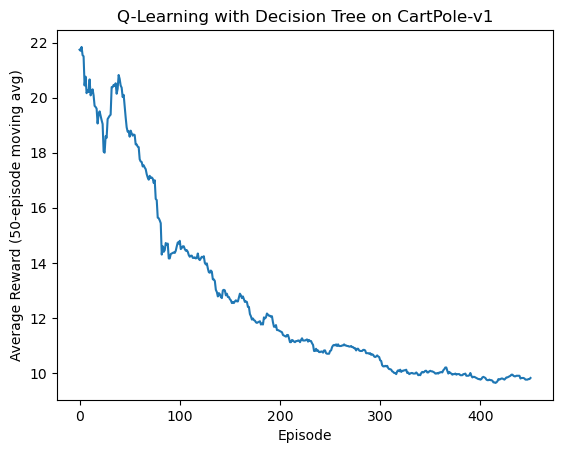

In [1]:
import numpy as np
import gymnasium as gym
from sklearn.tree import DecisionTreeRegressor
from collections import deque
import random

# Q-learning agent with decision tree approximation
class QLearningTreeAgent:
    def __init__(self, state_dim, n_actions, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1, max_depth=5):
        self.state_dim = state_dim
        self.n_actions = n_actions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=5, random_state=42)
        self.replay_buffer = deque(maxlen=10000)
        self.X_train = []  # State-action pairs
        self.y_train = []  # Q-value targets
    
    def act(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        q_values = self._predict_q_values(state)
        return np.argmax(q_values)
    
    def _predict_q_values(self, state):
        # Predict Q-values for all actions
        q_values = np.zeros(self.n_actions)
        for action in range(self.n_actions):
            state_action = np.append(state, action).reshape(1, -1)
            q_values[action] = self.q_tree.predict(state_action)[0] if len(self.X_train) > 0 else 0.0
        return q_values
    
    def store(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
    
    def train(self, batch_size=32):
        if len(self.replay_buffer) < batch_size:
            return
        batch = random.sample(self.replay_buffer, batch_size)
        
        X_batch = []
        y_batch = []
        for state, action, reward, next_state, done in batch:
            # Compute target Q-value
            next_q_values = self._predict_q_values(next_state)
            target = reward if done else reward + self.gamma * np.max(next_q_values)
            current_q = self._predict_q_values(state)[action]
            updated_q = current_q + self.alpha * (target - current_q)
            
            # Add to training data
            state_action = np.append(state, action)
            X_batch.append(state_action)
            y_batch.append(updated_q)
        
        # Update training data
        self.X_train.extend(X_batch)
        self.y_train.extend(y_batch)
        
        # Retrain decision tree
        if len(self.X_train) > 0:
            self.q_tree.fit(np.array(self.X_train), np.array(self.y_train))
    
    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# Training and evaluation
def main():
    env = gym.make('CartPole-v1')
    state_dim = env.observation_space.shape[0]  # 4 for CartPole
    n_actions = env.action_space.n  # 2 for CartPole
    agent = QLearningTreeAgent(state_dim=state_dim, n_actions=n_actions)
    
    n_episodes = 500
    max_steps = 500
    rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        
        for step in range(max_steps):
            action = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            agent.store(state, action, reward, next_state, done)
            agent.train(batch_size=32)
            state = next_state
            total_reward += reward
            
            if done:
                break
        
        agent.decay_epsilon()
        rewards.append(total_reward)
        
        if episode % 50 == 0:
            avg_reward = np.mean(rewards[-50:]) if rewards else 0
            print(f"Episode {episode}, Avg Reward (last 50): {avg_reward:.2f}, Epsilon: {agent.epsilon:.3f}")
    
    env.close()
    
    # Plot average rewards
    import matplotlib.pyplot as plt
    plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'))
    plt.xlabel('Episode')
    plt.ylabel('Average Reward (50-episode moving avg)')
    plt.title('Q-Learning with Decision Tree on CartPole-v1')
    plt.show()


if __name__ == "__main__":
    main()

0.55*3000

# Application



- QMIX: Monotonic Value Function Factorisation for Deep Multi-Agent Reinforcement Learning
https://arxiv.org/pdf/1803.11485

- *Reinforcement Learning 5*: Function Approximation and Deep Reinforcement Learning:
    https://www.youtube.com/watch?v=wAk1lxmiW4c&list=PLqYmG7hTraZBKeNJ-JE_eyJHZ7XgBoAyb&index=5
- *Reinforcement Learning 10*: Classic Games Case Study:
    https://www.youtube.com/watch?v=ld28AU7DDB4
